In [102]:
import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

%run functions.ipynb

**Perceptron (w/ offset):**

e.g.1

In [103]:
X = np.array([[1,3],[2.5, 1.5], [-1.5, 1.5]])
y = [1, 1, - 1]
df = pd.DataFrame(X, columns=['x1', 'x2'])
df = df.assign(y = y)

perceptron_with_offset(X, y, 100)

The data set has 2 features, 3 data points.

After 2 mistake(s), Perceptron Algorithm (w/ offset) yields theta = [[2.5]
 [1.5]], theta_0 = [0.] on the 2th instance



(array([[2.5],
        [1.5]]),
 array([0.]))

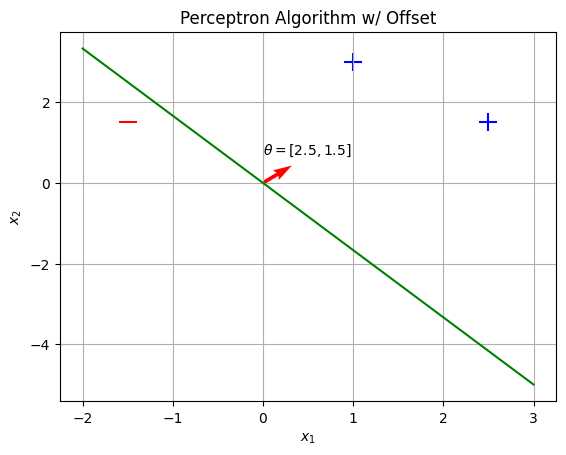

In [96]:
plt.scatter(df[df['y']==1]['x1'], df[df['y']==1]['x2'], marker='+', s=150, c='b')
plt.scatter(df[df['y']==-1]['x1'], df[df['y']==-1]['x2'], marker='_', s=150, c='r')
plt.plot(np.linspace(-2, 3, num=10), - 2.5*np.linspace(-2, 3, num=10)/1.5, color='g')
plt.title('Perceptron Algorithm w/ Offset')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')

plt.quiver(0, 0, 2.5, 1.5, color='r', units='xy', scale=5)
plt.text(0, 0.7, '$\\theta = [2.5, 1.5]$')

plt.grid()
plt.show()

e.g.2

In [104]:
X = np.array([[-3,2], [-1,1], [-1,-1],[2,2],[1,-1]]).reshape(5,2)
y = [1,-1,-1,-1,-1]

df = pd.DataFrame(X, columns=['x1', 'x2'])
df = df.assign(y=y)

perceptron_with_offset(X, y, 100)

The data set has 2 features, 5 data points.

After 9 mistake(s), Perceptron Algorithm (w/ offset) yields theta = [[-2.]
 [ 0.]], theta_0 = [-5.] on the 4th instance



(array([[-2.],
        [ 0.]]),
 array([-5.]))

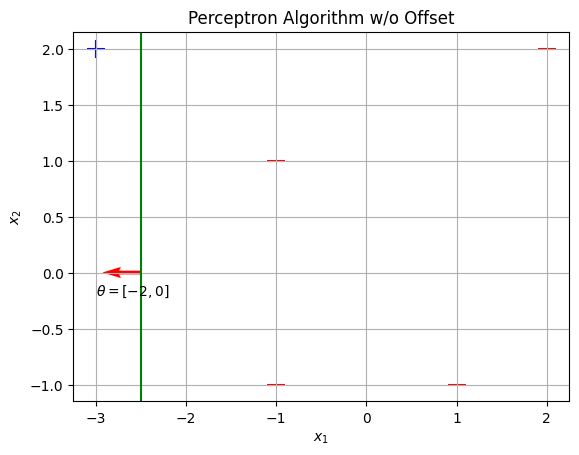

In [98]:
plt.scatter(df[df['y']==1]['x1'], df[df['y']==1]['x2'], marker='+', s=150, c='b')
plt.scatter(df[df['y']==-1]['x1'], df[df['y']==-1]['x2'], marker='_', s=150, c='r')
plt.axvline(x = -5/2, color = 'g', linestyle = '-') 
plt.title('Perceptron Algorithm w/o Offset')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')

plt.quiver(-2.5, 0, -2, 0, color='r', units='xy', scale=5)
plt.text(-3, -0.2, '$\\theta = [-2,0]$')

plt.grid()
plt.show()

**Perceptron through origin (w/o an offset term):**

e.g.1

In [105]:
X = np.array([[1], [2], [3], [4]])
y = np.array([[1], [1], [-1], [-1]])

df = pd.DataFrame(X, columns=['x1'])
df = df.assign(x2 = np.ones(X.shape[0]), y = y)

perceptron_through_origin(X, y, 100)

The data set has 1 features and 4 data points.

After 25 mistake(s), Perceptron Algorithm (w/o offset) yields theta = [[-3.]
 [ 7.]] on the 3th instance


array([[-3.],
       [ 7.]])

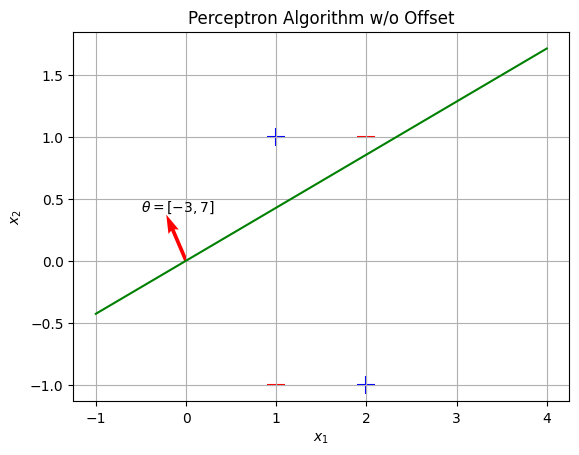

In [74]:
plt.scatter(df[df['y']==1]['x1'], df[df['y']==1]['x2'], marker='+', s=150, c='b')
plt.scatter(df[df['y']==-1]['x1'], df[df['y']==-1]['x2'], marker='_', s=150, c='r')
plt.plot(np.linspace(-1, 4, num=10),  (3/7)*np.linspace(-1, 4, num=10), 'g')
plt.title('Perceptron Algorithm w/o Offset')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')

plt.quiver(0, 0, -3, 7, color='r', units='xy', scale=15)
plt.text(-0.5, 0.4, '$\\theta = [-3,7]$')

plt.grid()
plt.show()

e.g.2

In [106]:
X = np.array([[1,-1],[0,1],[-1.5,1]]).reshape(3,2)
y = np.array([[1],[-1],[1]])

df = pd.DataFrame(X, columns=['x1','x2'])
df = df.assign(y = y)

perceptron_through_origin(X, y, 100)

The data set has 2 features and 3 data points.

After 9 mistake(s), Perceptron Algorithm (w/o offset) yields theta = [[-2.5]
 [-3. ]
 [ 1. ]] on the 2th instance


array([[-2.5],
       [-3. ],
       [ 1. ]])

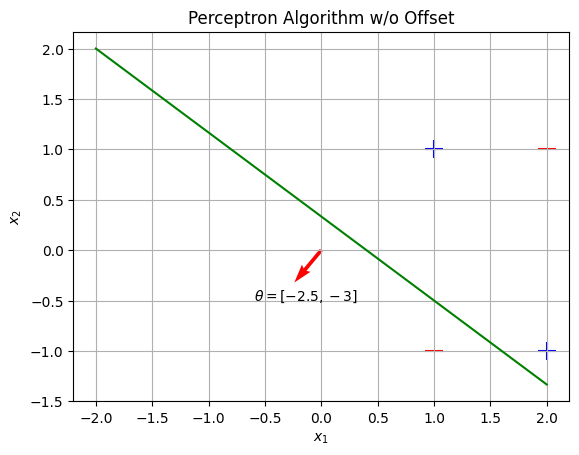

In [75]:
plt.scatter(df[df['y']==1]['x1'], df[df['y']==1]['x2'], marker='+', s=150, c='b')
plt.scatter(df[df['y']==-1]['x1'], df[df['y']==-1]['x2'], marker='_', s=150, c='r')
plt.plot(np.linspace(-2, 2, num=10),  (1/3)*(1 - 2.5*np.linspace(-2, 2, num=10)), 'g')
plt.title('Perceptron Algorithm w/o Offset')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')

plt.quiver(0, 0, -2.5, -3, color='r', units='xy', scale=10)
plt.text(-0.6, -0.5, '$\\theta = [-2.5,-3]$')

plt.grid()
plt.show()

e.g.3

In [107]:
X = np.array([[1,-1],[0,1],[-10,-1]]).reshape(3,2)
y = np.array([[1],[-1],[1]])

df = pd.DataFrame(X, columns=['x1','x2'])
df = df.assign(y = y)

perceptron_through_origin(X, y, 100)

The data set has 2 features and 3 data points.

After 5 mistake(s), Perceptron Algorithm (w/o offset) yields theta = [[-7.]
 [-5.]
 [ 3.]] on the 2th instance


array([[-7.],
       [-5.],
       [ 3.]])

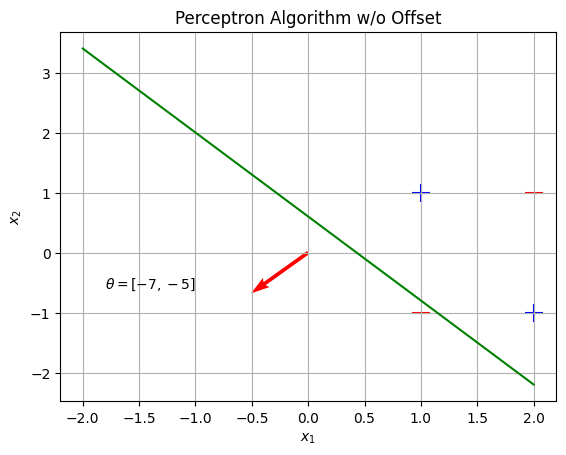

In [76]:
plt.scatter(df[df['y']==1]['x1'], df[df['y']==1]['x2'], marker='+', s=150, c='b')
plt.scatter(df[df['y']==-1]['x1'], df[df['y']==-1]['x2'], marker='_', s=150, c='r')
plt.plot(np.linspace(-2, 2, num=10),  (-1/5)*(-3 + 7*np.linspace(-2, 2, num=10)), 'g')
plt.title('Perceptron Algorithm w/o Offset')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')

plt.quiver(0, 0, -7, -5, color='r', units='xy', scale=10)
plt.text(-1.8, -0.6, '$\\theta = [-7,-5]$')

plt.grid()
plt.show()

**Linear separability:**

e.g.1 

In [108]:
X1 = np.array([[1,-1],[1,1],[2,-1],[2,1]]).reshape(4,2)
y1 = [-1,1,1,-1]

df1 = pd.DataFrame(X1, columns=['x1','x2'])
df1 = df1.assign(y = y1)

In [109]:
X2 = np.array([[1,-1],[1,1],[2,-1],[2,1]]).reshape(4,2)
y2 = [1,1,-1,-1]

df2 = pd.DataFrame(X2, columns=['x1','x2'])
df2 = df2.assign(y = y2)

perceptron_with_offset(X2, y2, 100)
perceptron_through_origin(X2, y2, 100)

The data set has 2 features, 4 data points.

After 18 mistake(s), Perceptron Algorithm (w/ offset) yields theta = [[-3.]
 [ 0.]], theta_0 = [4.] on the 3th instance

The data set has 2 features and 4 data points.

After 18 mistake(s), Perceptron Algorithm (w/o offset) yields theta = [[-3.]
 [ 0.]
 [ 4.]] on the 3th instance


array([[-3.],
       [ 0.],
       [ 4.]])

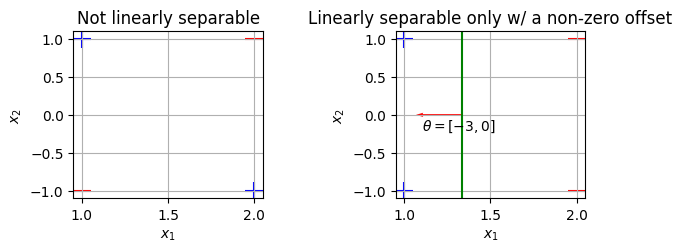

In [92]:
plt.subplot(2,2,1)
plt.scatter(df1[df1['y']==1]['x1'], df1[df1['y']==1]['x2'], marker='+', s=150, c='b')
plt.scatter(df1[df1['y']==-1]['x1'], df1[df1['y']==-1]['x2'], marker='_', s=150, c='r')
plt.title('Not linearly separable')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.grid()

plt.subplot(2,2,2)
plt.scatter(df2[df2['y']==1]['x1'], df2[df2['y']==1]['x2'], marker='+', s=150, c='b')
plt.scatter(df2[df2['y']==-1]['x1'], df2[df2['y']==-1]['x2'], marker='_', s=150, c='r')
plt.title('Linearly separable only w/ a non-zero offset')
plt.axvline(x = 4/3, color = 'g', linestyle = '-') 
plt.quiver(4/3, 0, -4/3, 0, color='r', units='xy', scale=3)
plt.text(1.1, -0.2, '$\\theta = [-3,0]$')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.grid()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.7, hspace=0.3)
plt.show()